## Multiple Minima vs Initial Guess
Editor: Saeid Sharify  
Date: 2021/10/10

#### Notebook import and packages

In [82]:
import matplotlib.pyplot as ppl
import numpy as np

%matplotlib inline

#### Multiple Minima vs Initial Guess
$$g(x) = x^4 - 4x^2 + 5$$

In [75]:
# make some data
X_2 = np.linspace(-2, 2, 1000)

# writing the functions
def g(x):
    return (x**4) - (4 * (x**2)) + 5

def dg(x):
    return (4*x**3) - (8 *x)

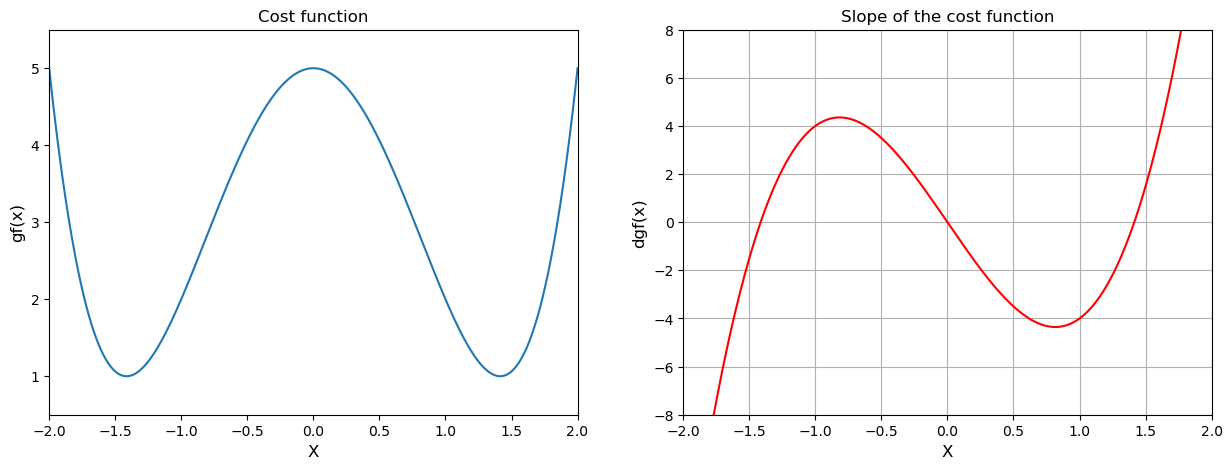

In [76]:
# plot both function and derivative
ppl.figure(figsize = [15,5])

# Cost function
ppl.subplot(1, 2, 1)
ppl.xlim(-2,2)
ppl.ylim(0.5, 5.5)

ppl.plot(X_2, g(X_2))
ppl.title('Cost function')
ppl.xlabel('X', fontsize = 12)
ppl.ylabel('gf(x)', fontsize = 12)

# Derivative
ppl.subplot(1, 2, 2)
ppl.xlim(-2,2)
ppl.ylim(-8, 8)

ppl.plot(X_2, dg(X_2), color = 'red')
ppl.title('Slope of the cost function')
ppl.xlabel('X', fontsize = 12)
ppl.ylabel('dgf(x)', fontsize = 12)
ppl.grid()

ppl.show()


We can see that there are two minimum on the cost function chart. And also on the slope of the cost function chart, there are three points where slope goes to zero. 

#### Gradient Descent with Python function

In [77]:
def gradient_descent(derivative_f, initial_guess, multiplier=0.01, precision=0.001):
    fresh_x = initial_guess

    # graphing by lists
    x_list = [fresh_x]
    slope_list = [derivative_f(fresh_x)]


    for i in range (999):
        old_x = fresh_x
        gradient = derivative_f(old_x)
        fresh_x = old_x - multiplier * gradient

        # appending for visuals
        x_list.append(fresh_x)
        slope_list.append(derivative_f(fresh_x))

        # set a target (precision) to stop the loop
        steps = abs(fresh_x - old_x)
        if steps < target:
            break
    return fresh_x, x_list, slope_list

    


In [78]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('local min occures at: ', local_min)
print('Number of steps: ', len(list_x))

local min occures at:  1.4140176512739588
Number of steps:  29


In [79]:
# supplying arguments by keyworks
local_min, list_x, deriv_list = gradient_descent(derivative_f = dg,
                                                 initial_guess = -0.5,
                                                 multiplier = 0.01,
                                                 precision = 0.001)
print('local min occures at: ', local_min)
print('Number of steps: ', len(list_x))

local min occures at:  -1.4137636556157256
Number of steps:  56


In [80]:
local_min, list_x, deriv_list = gradient_descent(derivative_f = dg,
                                                 initial_guess = -0.1)
print('local min occures at: ', local_min)
print('Number of steps: ', len(list_x))

local min occures at:  -1.413709226894381
Number of steps:  77


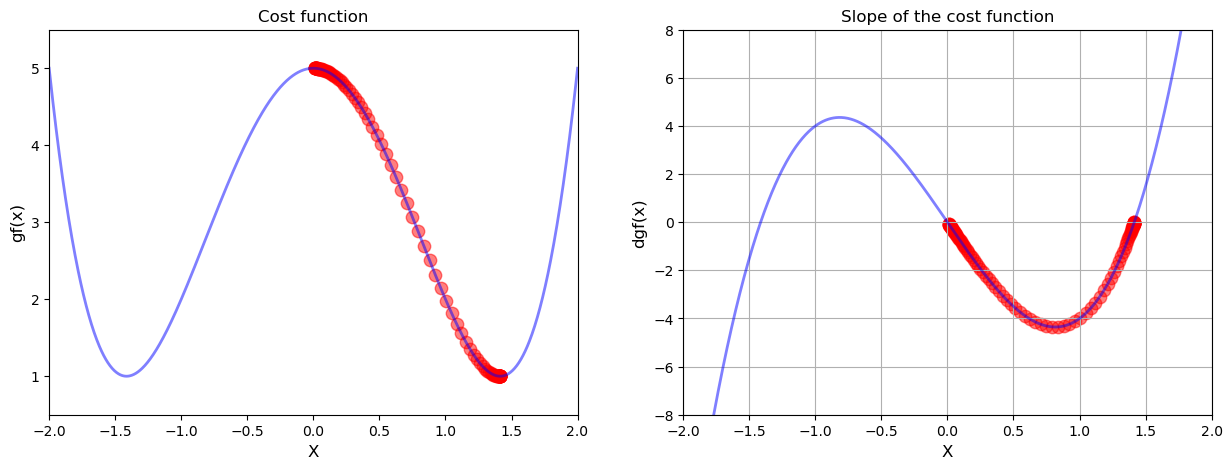

In [81]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_f = dg,
                                                 initial_guess = 0.01)
# plot function, derivative and plot side by side
ppl.figure(figsize = [15,5])

# Cost function
ppl.subplot(1, 2, 1)
ppl.xlim(-2,2)
ppl.ylim(0.5, 5.5)

ppl.plot(X_2, g(X_2), color='blue', linewidth=2, alpha=0.5)
ppl.scatter(list_x, g(np.array(list_x)), color = 'red', s=80, alpha=0.5)



ppl.title('Cost function')
ppl.xlabel('X', fontsize = 12)
ppl.ylabel('gf(x)', fontsize = 12)

# Derivative
ppl.subplot(1, 2, 2)
ppl.xlim(-2,2)
ppl.ylim(-8, 8)

ppl.plot(X_2, dg(X_2), color = 'blue', linewidth=2, alpha=0.5)
ppl.scatter(list_x, deriv_list, color='red', s=80, alpha=0.5)

ppl.title('Slope of the cost function')
ppl.xlabel('X', fontsize = 12)
ppl.ylabel('dgf(x)', fontsize = 12)
ppl.grid()

ppl.show()
